In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential , load_model
from keras.layers import Dense, LSTM, Bidirectional, RepeatVector, TimeDistributed , Flatten , ConvLSTM2D
from keras.layers import ConvLSTM2D
import math

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

(0.0, 2000.0)

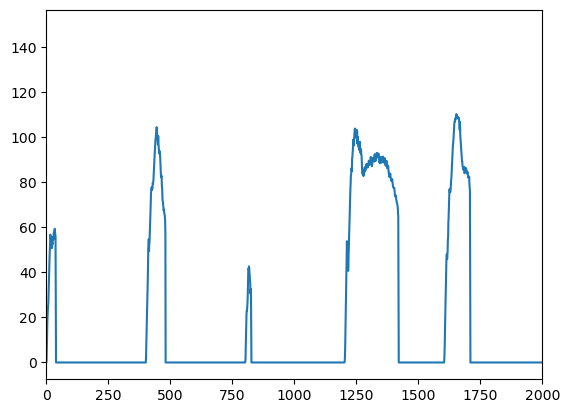

In [156]:
dataframe = pd.read_csv('output2.csv', usecols=[1])
dataframe = dataframe.iloc[:,0:2]
dataframe = dataframe.clip(lower=0)
plt.plot(dataframe)
plt.xlim([0,2000])

In [157]:
dataset = df.values
dataset = dataset.astype('float32')

In [158]:
dataset

array([[0.    ],
       [1.3591],
       [5.7585],
       ...,
       [0.    ],
       [0.    ],
       [0.    ]], dtype=float32)

In [159]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [161]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
test.shape

(80200, 1)

In [162]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [163]:
seq_size = 10  # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [139]:
trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

(320789,)

In [166]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu',  input_shape=(1,1 ,1, seq_size)))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_4 (ConvLSTM2D)  (None, 1, 1, 64)          19200     
                                                                 
 dense_28 (Dense)            (None, 1, 1, 50)          3250      
                                                                 
 dense_29 (Dense)            (None, 1, 1, 1)           51        
                                                                 
Total params: 22501 (87.89 KB)
Trainable params: 22501 (87.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
trainY

array([0.2396539 , 0.27360654, 0.28380173, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [169]:
model.fit(trainX, trainY, validation_data=(testX, testY),epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 1, 1, 1, 10), found shape=(None, 10)


In [170]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

ValueError: in user code:

    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\PLEXTEK\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 1, 1, 1, 10), found shape=(None, 10)


In [146]:
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [147]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

ValueError: Expected 2D array, got 1D array instead:
array=[0.2396539  0.27360654 0.28380173 ... 0.         0.         0.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [148]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

TypeError: Singleton array 0.2396539 cannot be considered a valid collection.